1 . Tensor Manipulations and Reshaping

In [ ]:
# Section 1: Tensor Manipulations & Reshaping
import tensorflow as tf

# Create a random tensor of shape (4, 6)
tensor = tf.random.uniform((4, 6))
print("Original Tensor:\n", tensor)

# Find rank and shape
print("Rank:", tf.rank(tensor).numpy())
print("Shape:", tensor.shape)

# Reshape to (2, 3, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print("Reshaped Tensor (2,3,4):\n", reshaped_tensor)

# Transpose to (3, 2, 4)
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print("Transposed Tensor (3,2,4):\n", transposed_tensor)

# Broadcasting example
small_tensor = tf.constant([[1, 2, 3, 4]], dtype=tf.float32)
broadcasted = tf.broadcast_to(small_tensor, [3, 4])
print("Broadcasted Tensor:\n", broadcasted)

# Add broadcasted tensor to a compatible tensor
added_result = broadcasted + tf.ones((3, 4))
print("Result of Broadcasted Addition:\n", added_result)

# Broadcasting Explanation
print("\nBroadcasting allows smaller tensors to match larger tensors by auto-expanding dimensions.")

Original Tensor:
 tf.Tensor(
[[0.26218843 0.7246082  0.11152279 0.81594026 0.44488585 0.7392136 ]
 [0.9602324  0.16518235 0.07193947 0.77597475 0.46224034 0.11138272]
 [0.12729001 0.8042685  0.3117299  0.19165432 0.9370245  0.6117109 ]
 [0.96877277 0.34423316 0.24525797 0.73299253 0.68144    0.9492165 ]], shape=(4, 6), dtype=float32)
Rank: 2
Shape: (4, 6)
Reshaped Tensor (2,3,4):
 tf.Tensor(
[[[0.26218843 0.7246082  0.11152279 0.81594026]
  [0.44488585 0.7392136  0.9602324  0.16518235]
  [0.07193947 0.77597475 0.46224034 0.11138272]]

 [[0.12729001 0.8042685  0.3117299  0.19165432]
  [0.9370245  0.6117109  0.96877277 0.34423316]
  [0.24525797 0.73299253 0.68144    0.9492165 ]]], shape=(2, 3, 4), dtype=float32)
Transposed Tensor (3,2,4):
 tf.Tensor(
[[[0.26218843 0.7246082  0.11152279 0.81594026]
  [0.12729001 0.8042685  0.3117299  0.19165432]]

 [[0.44488585 0.7392136  0.9602324  0.16518235]
  [0.9370245  0.6117109  0.96877277 0.34423316]]

 [[0.07193947 0.77597475 0.46224034 0.1113827

2. Loss Functions and Hyperparameter Tuning

MSE (pred1): 0.0200, MSE (pred2): 0.1800
CCE (pred1): 0.2231, CCE (pred2): 0.9163


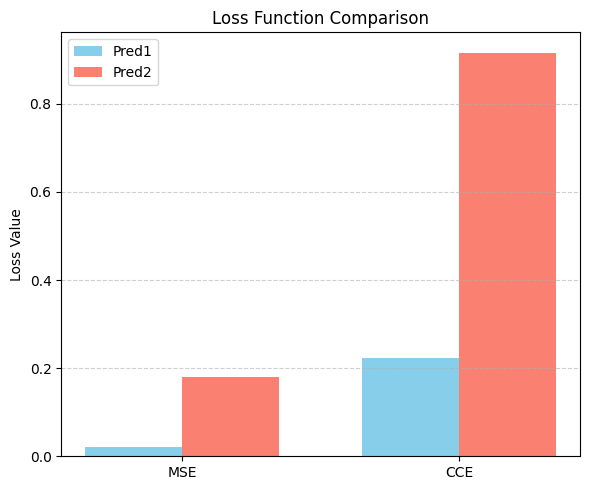

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# True labels (one-hot)
y_true = tf.constant([[0, 1, 0]], dtype=tf.float32)

# Predicted probabilities (2 versions)
y_pred1 = tf.constant([[0.1, 0.8, 0.1]], dtype=tf.float32)
y_pred2 = tf.constant([[0.3, 0.4, 0.3]], dtype=tf.float32)

# Mean Squared Error
mse = tf.keras.losses.MeanSquaredError()
mse1 = mse(y_true, y_pred1).numpy()
mse2 = mse(y_true, y_pred2).numpy()

# Categorical Cross Entropy
cce = tf.keras.losses.CategoricalCrossentropy()
cce1 = cce(y_true, y_pred1).numpy()
cce2 = cce(y_true, y_pred2).numpy()

# Print losses
print(f"MSE (pred1): {mse1:.4f}, MSE (pred2): {mse2:.4f}")
print(f"CCE (pred1): {cce1:.4f}, CCE (pred2): {cce2:.4f}")

# Bar Chart Comparison
labels = ['MSE', 'CCE']
loss1 = [mse1, cce1]
loss2 = [mse2, cce2]

x = range(len(labels))
bar_width = 0.35

# Plot bars
plt.figure(figsize=(6, 5))
plt.bar(x, loss1, width=bar_width, label='Pred1', color='skyblue')
plt.bar([i + bar_width for i in x], loss2, width=bar_width, label='Pred2', color='salmon')

# X-ticks in center
plt.xticks([i + bar_width / 2 for i in x], labels)

plt.title("Loss Function Comparison")
plt.ylabel("Loss Value")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


3. Train Neural Network and use TensorBoard

In [ ]:
# Section 3: Neural Network Training with TensorBoard
import datetime

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# TensorBoard log setup
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train model
model.fit(x_train, y_train, epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8759 - loss: 0.4396 - val_accuracy: 0.9567 - val_loss: 0.1491
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9646 - loss: 0.1234 - val_accuracy: 0.9666 - val_loss: 0.1061
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9751 - loss: 0.0841 - val_accuracy: 0.9720 - val_loss: 0.0879
Epoch 4/5
 145/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0533

4. TensorBoard

In [ ]:
# Run this in a separate cell
%load_ext tensorboard
%tensorboard --logdir logs/fit

### Section 4.1: TensorBoard Questions

**Q1. What patterns do you observe in the training and validation accuracy curves?**  
Both curves increase and stay close to each other. Training accuracy reached 0.9862, and validation accuracy reached 0.9728. This suggests the model is generalizing well and is not overfitting.

**Q2. How can you use TensorBoard to detect overfitting?**  
If the training accuracy keeps increasing while validation accuracy decreases or flattens, it indicates overfitting. Also, a growing gap between training and validation loss is a sign of overfitting.

**Q3. What happens when you increase the number of epochs?**  
Initially, performance improves. But after a certain point, the model may overfit — training accuracy increases while validation accuracy decreases. This can be monitored using TensorBoard.
